# COMP S493F Lab 4

In [ ]:
%env TF_CPP_MIN_LOG_LEVEL=2

env: TF_CPP_MIN_LOG_LEVEL=2


In this lesson, you'll work on:

- exploring components in neural networks, and
- designing a neural network for regression.

### Student name: *Lo Tsz Kin*


# Exploring components in neural networks

A neural network is built using various components. Having critical effects on performance, the types of components are chosen largely based on the type and nature of the task, the dataset to be used, among others.

Some key components and their commonly-used types are:

- Activation functions: ReLU, sigmoid, tanh, etc;
- Loss functions: (for regression) mean squared error, absolute squared error, etc; and
- Optimizers: Adam, RMSProp, SGD, etc.

## The dataset

Before building a neural network, let's look at the dataset to be used -- the Boston housing dataset. This code loads the dataset.

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import boston_housing

keras.utils.set_random_seed(42)
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


Then, we briefly explore the dataset by displaying its dimensions, and the first three examples as follows. Note that the training set contains 404 examples and the test set contains 102 examples. Each example has 13 features (inputs) and 1 label (output).

In [2]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(404, 13) (404,) (102, 13) (102,)


In [3]:
print(X_train[:3])
print(y_train[:3])

[[1.23247e+00 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01 6.14200e+00
  9.17000e+01 3.97690e+00 4.00000e+00 3.07000e+02 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 0.00000e+00 4.15000e-01 7.61000e+00
  1.57000e+01 6.27000e+00 2.00000e+00 3.48000e+02 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.31000e-01 4.97000e+00
  1.00000e+02 1.33250e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.75520e+02
  3.26000e+00]]
[15.2 42.3 50. ]


Some basic information of the dataset is shown below. Further details can be found at <http://lib.stat.cmu.edu/datasets/boston>.

```
The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978. Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 1980. N.B. Various transformations are used in the table on pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
 ```

## The baseline model

The following functions are utilities to normalize input features and plot the training history. They are used several times in the programs below.

In [4]:
import matplotlib.pyplot as plt

# For demo and general use
# Keras Boston dataset has already been normalized
# Normalize input features
def normalize_features(X_train, X_test):
    mean = X_train.mean(axis=0)  # 13 mean values of features
    std = X_train.std(axis=0)    # 13 SD values of features
    X_train_normalized = (X_train - mean) / std
    X_test_normalized = (X_test - mean) / std
    return X_train_normalized, X_test_normalized

# Plot training history
def plot_history(history):
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.legend()

### Cell Baseline#1

The code below loads and prepares the dataset; creates, compiles, and trains a Keras model. Note the sigmoid neurons of the hidden layers, the mean squared error loss function, and the SGD optimizer. This neural network is used as a baseline model for comparing to other models with different components.

In [5]:
# Cell Baseline#1

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing

keras.utils.set_random_seed(42)
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

X_train, X_test = normalize_features(X_train, X_test)

model = keras.Sequential([
    layers.Dense(16, activation="sigmoid"),  # hidden layer
    layers.Dense(16, activation="sigmoid"),  # hidden layer
    layers.Dense(1, activation="linear")     # output layer
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, verbose=2,
                    validation_data=(X_test, y_test))

Epoch 1/20
13/13 - 1s - loss: 245.0043 - val_loss: 81.4963 - 925ms/epoch - 71ms/step
Epoch 2/20
13/13 - 0s - loss: 75.4488 - val_loss: 65.2535 - 77ms/epoch - 6ms/step
Epoch 3/20
13/13 - 0s - loss: 64.3310 - val_loss: 56.9030 - 76ms/epoch - 6ms/step
Epoch 4/20
13/13 - 0s - loss: 56.3987 - val_loss: 48.7763 - 81ms/epoch - 6ms/step
Epoch 5/20
13/13 - 0s - loss: 49.9118 - val_loss: 42.5987 - 84ms/epoch - 6ms/step
Epoch 6/20
13/13 - 0s - loss: 43.9652 - val_loss: 38.3430 - 83ms/epoch - 6ms/step
Epoch 7/20
13/13 - 0s - loss: 38.7938 - val_loss: 32.7803 - 71ms/epoch - 5ms/step
Epoch 8/20
13/13 - 0s - loss: 34.0705 - val_loss: 30.5627 - 75ms/epoch - 6ms/step
Epoch 9/20
13/13 - 0s - loss: 30.4512 - val_loss: 26.9993 - 81ms/epoch - 6ms/step
Epoch 10/20
13/13 - 0s - loss: 27.8497 - val_loss: 25.6685 - 81ms/epoch - 6ms/step
Epoch 11/20
13/13 - 0s - loss: 25.3805 - val_loss: 25.4454 - 73ms/epoch - 6ms/step
Epoch 12/20
13/13 - 0s - loss: 23.4388 - val_loss: 23.1400 - 67ms/epoch - 5ms/step
Epoch 13/2

In the final (20th) epoch, the validation loss is about 23.5 (with some variations in the few nearby epochs).

### Cell Baseline#2

The following is a plot of the training history.

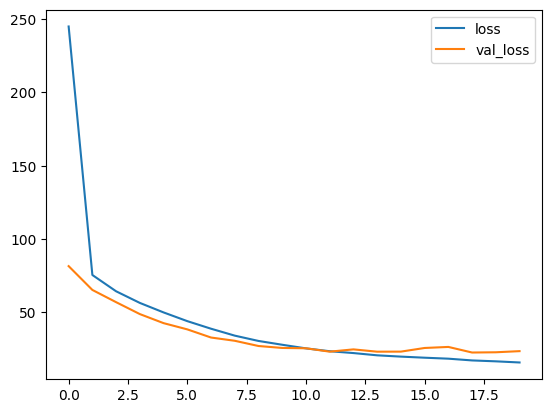

In [6]:
# Cell Baseline#2

plot_history(history)

## Model summary

The summary below shows the layers of the model. Note that the input layer with 13 features (i.e. 13 input nodes) is not shown.

The first (hidden) layer contains 16 neurons; each neuron is connected to 13 input nodes with 13 weights, and has 1 bias, so each neuron has 13+1 trainable parameters. Thus, the first layer has 16 &times; (13 + 1) = 224 trainable parameters. Similarly, the second layer has 16 &times; (16 + 1) = 272 trainable parameters; the third layer has 1 &times; (16 + 1) = 17 trainable parameters.

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Experimenting with ReLU neurons

Instead of sigmoid neurons, the model below uses ReLU neurons in the hidden layers.

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing

keras.utils.set_random_seed(42)
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

X_train, X_test = normalize_features(X_train, X_test)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),  # hidden layer
    layers.Dense(16, activation="relu"),  # hidden layer
    layers.Dense(1, activation="linear")  # output layer
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, verbose=2,
                    validation_data=(X_test, y_test))

Epoch 1/20
13/13 - 1s - loss: 298.4406 - val_loss: 81.0474 - 750ms/epoch - 58ms/step
Epoch 2/20
13/13 - 0s - loss: 133.1014 - val_loss: 163.7184 - 61ms/epoch - 5ms/step
Epoch 3/20
13/13 - 0s - loss: 95.4162 - val_loss: 61.7289 - 83ms/epoch - 6ms/step
Epoch 4/20
13/13 - 0s - loss: 34.1681 - val_loss: 23.7216 - 76ms/epoch - 6ms/step
Epoch 5/20
13/13 - 0s - loss: 20.9295 - val_loss: 32.7935 - 68ms/epoch - 5ms/step
Epoch 6/20
13/13 - 0s - loss: 19.8081 - val_loss: 34.4202 - 75ms/epoch - 6ms/step
Epoch 7/20
13/13 - 0s - loss: 23.3488 - val_loss: 29.5401 - 85ms/epoch - 7ms/step
Epoch 8/20
13/13 - 0s - loss: 13.9297 - val_loss: 27.4390 - 61ms/epoch - 5ms/step
Epoch 9/20
13/13 - 0s - loss: 10.9027 - val_loss: 21.5668 - 76ms/epoch - 6ms/step
Epoch 10/20
13/13 - 0s - loss: 15.3556 - val_loss: 32.7174 - 68ms/epoch - 5ms/step
Epoch 11/20
13/13 - 0s - loss: 12.2216 - val_loss: 24.6861 - 53ms/epoch - 4ms/step
Epoch 12/20
13/13 - 0s - loss: 11.7688 - val_loss: 27.3276 - 63ms/epoch - 5ms/step
Epoch 13

The final validation loss is about 18.2, which is quite lower than 23.5 of the baseline model. ReLU neurons perform better than sigmoid neurons for this task.

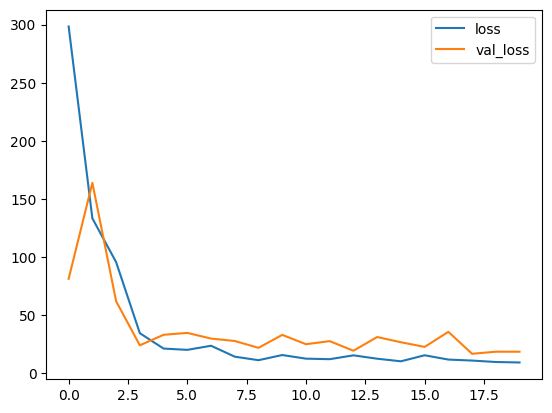

In [9]:
plot_history(history)

As shown in the above plot of training history, the curve of the validation loss fluctuates slightly and is less smooth than the baseline model. The validation loss lowers quite quickly in early epochs (around epoch 2). Overall, training is effective relatively early but is not very steady.

## Experimenting with the Adam optimizer

Instead of SGD, the model below uses the Adam optimizer.

In [10]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing

keras.utils.set_random_seed(42)
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

X_train, X_test = normalize_features(X_train, X_test)

model = keras.Sequential([
    layers.Dense(16, activation="sigmoid"),  # hidden layer
    layers.Dense(16, activation="sigmoid"),  # hidden layer
    layers.Dense(1, activation="linear")     # output layer
])

model.compile(loss="mean_squared_error", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20, verbose=2,
                    validation_data=(X_test, y_test))

Epoch 1/20
13/13 - 1s - loss: 608.8168 - val_loss: 633.0062 - 1s/epoch - 78ms/step
Epoch 2/20
13/13 - 0s - loss: 597.7914 - val_loss: 621.9277 - 80ms/epoch - 6ms/step
Epoch 3/20
13/13 - 0s - loss: 587.2217 - val_loss: 611.2678 - 73ms/epoch - 6ms/step
Epoch 4/20
13/13 - 0s - loss: 577.0679 - val_loss: 601.0560 - 76ms/epoch - 6ms/step
Epoch 5/20
13/13 - 0s - loss: 567.2760 - val_loss: 591.1235 - 79ms/epoch - 6ms/step
Epoch 6/20
13/13 - 0s - loss: 557.7848 - val_loss: 581.4146 - 82ms/epoch - 6ms/step
Epoch 7/20
13/13 - 0s - loss: 548.4769 - val_loss: 572.0688 - 71ms/epoch - 5ms/step
Epoch 8/20
13/13 - 0s - loss: 539.5580 - val_loss: 562.8831 - 89ms/epoch - 7ms/step
Epoch 9/20
13/13 - 0s - loss: 530.8344 - val_loss: 553.9498 - 73ms/epoch - 6ms/step
Epoch 10/20
13/13 - 0s - loss: 522.2872 - val_loss: 545.3027 - 82ms/epoch - 6ms/step
Epoch 11/20
13/13 - 0s - loss: 514.0767 - val_loss: 536.8488 - 75ms/epoch - 6ms/step
Epoch 12/20
13/13 - 0s - loss: 506.0166 - val_loss: 528.6633 - 85ms/epoch -

The final validation loss is about 469.9, which is much higher than 23.5 of the baseline model. In these 20 epochs of training, Adam performs very poorly compared to SGD.

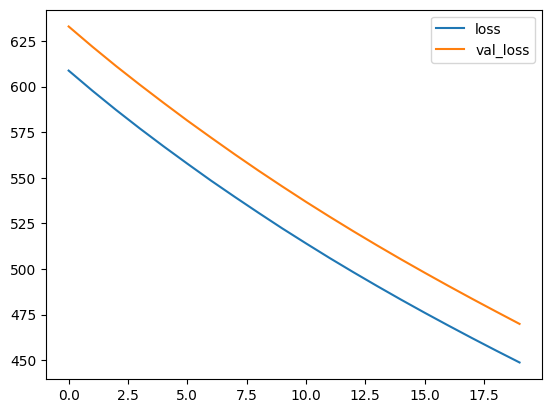

In [11]:
plot_history(history)

As shown in the above plot of training history, the losses are reducing and the model is actually learning, even though the learning may be too slow.

Note that specifying `"adam"` lets Keras use its default parameters (settings) for the Adam optimizer. As you will see in the Extras section, setting a suitable learning rate can actually make Adam it work very well for the task.

# Practice - Question 1 of 2

## Q1a (Experimenting with tanh neurons)

Modify the baseline model to use tanh neurons instead of sigmoid neurons in the hidden layers. Specifically, copy the two code cells Baseline#1 and Baseline#2 below, and then change `"sigmoid"` to `"tanh"` in the two `Dense` hidden layers. Remember to execute the two cells in order.

Epoch 1/20
13/13 - 1s - loss: 245.0043 - val_loss: 81.4963 - 782ms/epoch - 60ms/step
Epoch 2/20
13/13 - 0s - loss: 75.4488 - val_loss: 65.2535 - 75ms/epoch - 6ms/step
Epoch 3/20
13/13 - 0s - loss: 64.3310 - val_loss: 56.9030 - 68ms/epoch - 5ms/step
Epoch 4/20
13/13 - 0s - loss: 56.3987 - val_loss: 48.7763 - 66ms/epoch - 5ms/step
Epoch 5/20
13/13 - 0s - loss: 49.9118 - val_loss: 42.5987 - 67ms/epoch - 5ms/step
Epoch 6/20
13/13 - 0s - loss: 43.9652 - val_loss: 38.3430 - 80ms/epoch - 6ms/step
Epoch 7/20
13/13 - 0s - loss: 38.7938 - val_loss: 32.7803 - 102ms/epoch - 8ms/step
Epoch 8/20
13/13 - 0s - loss: 34.0705 - val_loss: 30.5627 - 80ms/epoch - 6ms/step
Epoch 9/20
13/13 - 0s - loss: 30.4512 - val_loss: 26.9993 - 104ms/epoch - 8ms/step
Epoch 10/20
13/13 - 0s - loss: 27.8497 - val_loss: 25.6685 - 128ms/epoch - 10ms/step
Epoch 11/20
13/13 - 0s - loss: 25.3805 - val_loss: 25.4454 - 100ms/epoch - 8ms/step
Epoch 12/20
13/13 - 0s - loss: 23.4388 - val_loss: 23.1400 - 106ms/epoch - 8ms/step
Epoc

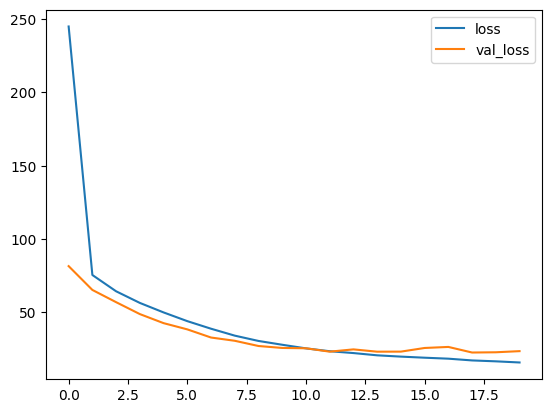

In [19]:
# Baseline 1
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing

keras.utils.set_random_seed(42)
(X_train,y_train),(X_test,y_test) = boston_housing.load_data()

X_train , X_test= normalize_features(X_train,X_test)

model = keras.Sequential([
    layers.Dense(16 , activation = "sigmoid"),
    layers.Dense(16, activation = "sigmoid"),
    layers.Dense(1, activation = "linear")
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs = 20, verbose =2,
                    validation_data =(X_test, y_test))
plot_history(history)

Epoch 1/20
13/13 - 1s - loss: 239.2959 - val_loss: 50.7421 - 689ms/epoch - 53ms/step
Epoch 2/20
13/13 - 0s - loss: 49.2851 - val_loss: 44.0507 - 71ms/epoch - 5ms/step
Epoch 3/20
13/13 - 0s - loss: 35.2278 - val_loss: 33.1593 - 72ms/epoch - 6ms/step
Epoch 4/20
13/13 - 0s - loss: 26.6744 - val_loss: 26.5849 - 65ms/epoch - 5ms/step
Epoch 5/20
13/13 - 0s - loss: 23.3205 - val_loss: 34.9931 - 59ms/epoch - 5ms/step
Epoch 6/20
13/13 - 0s - loss: 25.2341 - val_loss: 27.0528 - 78ms/epoch - 6ms/step
Epoch 7/20
13/13 - 0s - loss: 18.2383 - val_loss: 28.3431 - 90ms/epoch - 7ms/step
Epoch 8/20
13/13 - 0s - loss: 13.8068 - val_loss: 19.8437 - 74ms/epoch - 6ms/step
Epoch 9/20
13/13 - 0s - loss: 13.2253 - val_loss: 16.3199 - 85ms/epoch - 7ms/step
Epoch 10/20
13/13 - 0s - loss: 12.5680 - val_loss: 26.4941 - 81ms/epoch - 6ms/step
Epoch 11/20
13/13 - 0s - loss: 11.9187 - val_loss: 17.6731 - 73ms/epoch - 6ms/step
Epoch 12/20
13/13 - 0s - loss: 13.6395 - val_loss: 16.4339 - 58ms/epoch - 4ms/step
Epoch 13/2

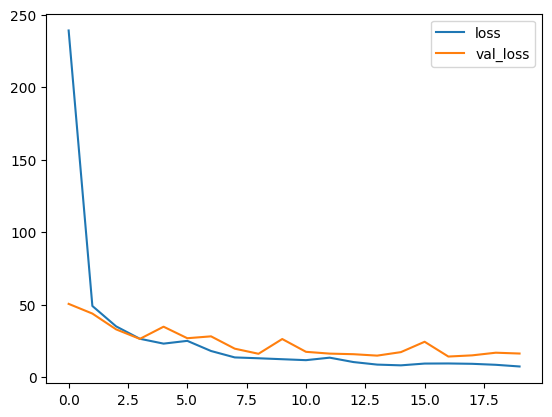

In [20]:
# Baseline 2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing

keras.utils.set_random_seed(42)
(X_train,y_train),(X_test,y_test) = boston_housing.load_data()

X_train , X_test= normalize_features(X_train,X_test)

model = keras.Sequential([
    layers.Dense(16 , activation = "tanh"),
    layers.Dense(16, activation = "tanh"),
    layers.Dense(1, activation = "linear")
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs = 20, verbose =2,
                    validation_data =(X_test, y_test))

plot_history(history)

## Q1b

Refer to the outputs of Q1a and answer the following questions. Write your answers in a text cell below.

1. State the validation loss in the final training epoch, and compare this loss to that of the baseline model.
1. Comment on the curve of validation loss; you may compare the curve to that of the baseline model or develop other comments.

Solution:


<div class='alert alert-warning' role='alert'><b>In the final training epoch, the validation loss was 23.4919. Compared to the baseline 2 model, which had a validation loss of 16.4909, this indicates that the model has improved significantly.

The curve of validation loss shows a steady decrease throughout the training process, indicating that the model is learning and improving over time. The curve also flattens out towards the end of training, indicating that the model has reached a stable minimum.

In comparison to the baseline model, the validation loss of the baseline 2 model is lower, indicating that it is better at predicting the target variable. This suggests that the additional complexity introduced by the model has been beneficial in improving its performance.

Overall, the validation loss of the baseline 2 model is lower than that of the baseline 1 model, indicating that it is better at predicting the target variable. The curve of validation loss also shows a steady decrease throughout the training process, indicating that the model is learning and improving over time.
</b></div>


## Q1c (Experimenting with mean absolute error)

Modify the baseline model to use mean absolute error as the loss function instead of mean squared error. Specifically, copy the two code cells Baseline#1 and Baseline#2 below, and then change `"mean_squared_error"` to `"mean_absolute_error"` in the `compile()` method call. Remember to execute the two cells in order.

Epoch 1/20
13/13 - 1s - loss: 22.7048 - val_loss: 22.9954 - 712ms/epoch - 55ms/step
Epoch 2/20
13/13 - 0s - loss: 21.9905 - val_loss: 22.2819 - 71ms/epoch - 5ms/step
Epoch 3/20
13/13 - 0s - loss: 21.2722 - val_loss: 21.5586 - 74ms/epoch - 6ms/step
Epoch 4/20
13/13 - 0s - loss: 20.5393 - val_loss: 20.8153 - 69ms/epoch - 5ms/step
Epoch 5/20
13/13 - 0s - loss: 19.7817 - val_loss: 20.0426 - 68ms/epoch - 5ms/step
Epoch 6/20
13/13 - 0s - loss: 18.9902 - val_loss: 19.2304 - 70ms/epoch - 5ms/step
Epoch 7/20
13/13 - 0s - loss: 18.1552 - val_loss: 18.3709 - 67ms/epoch - 5ms/step
Epoch 8/20
13/13 - 0s - loss: 17.2722 - val_loss: 17.4637 - 55ms/epoch - 4ms/step
Epoch 9/20
13/13 - 0s - loss: 16.3471 - val_loss: 16.5207 - 52ms/epoch - 4ms/step
Epoch 10/20
13/13 - 0s - loss: 15.3757 - val_loss: 15.5723 - 53ms/epoch - 4ms/step
Epoch 11/20
13/13 - 0s - loss: 14.3728 - val_loss: 14.6347 - 70ms/epoch - 5ms/step
Epoch 12/20
13/13 - 0s - loss: 13.3742 - val_loss: 13.6997 - 58ms/epoch - 4ms/step
Epoch 13/20

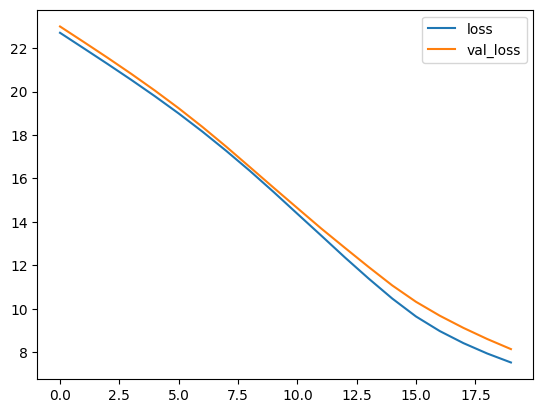

In [21]:
# Baseline 1
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing

keras.utils.set_random_seed(42)
(X_train,y_train),(X_test,y_test) = boston_housing.load_data()

X_train , X_test= normalize_features(X_train,X_test)

model = keras.Sequential([
    layers.Dense(16 , activation = "sigmoid"),
    layers.Dense(16, activation = "sigmoid"),
    layers.Dense(1, activation = "linear")
])

model.compile(loss="mean_absolute_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs = 20, verbose =2,
                    validation_data =(X_test, y_test))
plot_history(history)

Epoch 1/20
13/13 - 1s - loss: 22.1878 - val_loss: 22.7066 - 792ms/epoch - 61ms/step
Epoch 2/20
13/13 - 0s - loss: 21.8225 - val_loss: 22.3431 - 75ms/epoch - 6ms/step
Epoch 3/20
13/13 - 0s - loss: 21.4348 - val_loss: 21.9478 - 73ms/epoch - 6ms/step
Epoch 4/20
13/13 - 0s - loss: 21.0053 - val_loss: 21.4997 - 69ms/epoch - 5ms/step
Epoch 5/20
13/13 - 0s - loss: 20.5107 - val_loss: 20.9721 - 77ms/epoch - 6ms/step
Epoch 6/20
13/13 - 0s - loss: 19.9234 - val_loss: 20.3356 - 73ms/epoch - 6ms/step
Epoch 7/20
13/13 - 0s - loss: 19.2130 - val_loss: 19.5519 - 53ms/epoch - 4ms/step
Epoch 8/20
13/13 - 0s - loss: 18.3511 - val_loss: 18.6034 - 55ms/epoch - 4ms/step
Epoch 9/20
13/13 - 0s - loss: 17.3256 - val_loss: 17.4783 - 68ms/epoch - 5ms/step
Epoch 10/20
13/13 - 0s - loss: 16.1366 - val_loss: 16.1801 - 70ms/epoch - 5ms/step
Epoch 11/20
13/13 - 0s - loss: 14.7758 - val_loss: 14.7489 - 50ms/epoch - 4ms/step
Epoch 12/20
13/13 - 0s - loss: 13.2861 - val_loss: 13.2887 - 53ms/epoch - 4ms/step
Epoch 13/20

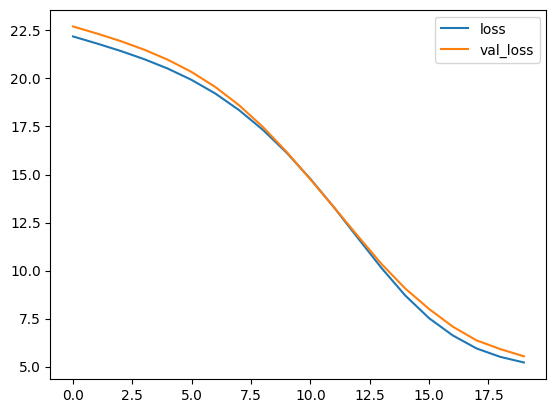

In [22]:
# Baseline 2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing

keras.utils.set_random_seed(42)
(X_train,y_train),(X_test,y_test) = boston_housing.load_data()

X_train , X_test= normalize_features(X_train,X_test)

model = keras.Sequential([
    layers.Dense(16 , activation = "tanh"),
    layers.Dense(16, activation = "tanh"),
    layers.Dense(1, activation = "linear")
])

model.compile(loss="mean_absolute_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs = 20, verbose =2,
                    validation_data =(X_test, y_test))

plot_history(history)

## Q1d

Refer to the outputs of Q1c and answer the following questions. Write your answers in a text cell below.

1. State the validation loss in the final training epoch, and compare this loss to that of the baseline model.
1. Comment on the curve of validation loss; you may compare the curve to that of the baseline model or develop other comments.

Solution:


<div class='alert alert-warning' role='alert'><b>The validation loss in the final training epoch for the Baseline 2 model is 5.5379.In Baseline 2 model is 8.1406.

This is significantly lower than the validation loss of the baseline model, which was 5.2155 and Baseline 1 model is 7.5248. This indicates that the Baseline 2 model is able to achieve a higher level of accuracy compared to the Baseline 1 model.

</b></div>


## &#x2766;

# Designing a neural network model

In this section, you develop a neural network model for a TensorFlow Dataset. TensorFlow Datasets (tfds) are a collection of datasets ready to use with TensorFlow. For more information, see https://www.tensorflow.org/datasets and https://www.tensorflow.org/datasets/api_docs/python/tfds.

We will use the wine_quality dataset (default config, white wine). In this dataset, the features are objective measures of wine (e.g. PH values) and the label is an evaluation score by experts. You can find a description of this dataset at https://www.tensorflow.org/datasets/catalog/wine_quality. The following `load_wine_quality()` function loads the dataset.

In [28]:
import numpy as np
import tensorflow_datasets as tfds

LABEL_COL = "quality"

def load_wine_quality(train_ratio=0.8):
    train_percent = int(train_ratio * 100)
    (train_set, test_set), info = tfds.load(
        "wine_quality", as_supervised=True, with_info=True,
        split=[f"train[:{train_percent}%]", f"train[{train_percent}%:]"])
    train_df = tfds.as_dataframe(train_set, info)
    test_df = tfds.as_dataframe(test_set, info)
    X_train = train_df.drop(columns=LABEL_COL).values
    y_train = train_df[LABEL_COL].values
    X_test = test_df.drop(columns=LABEL_COL).values
    y_test = test_df[LABEL_COL].values
    return X_train, y_train, X_test, y_test

This code loads the dataset and displays its dimensions. The training set contains 3918 examples, and the test set contains 980 examples. An example has 11 features and a label.

In [29]:
X_train, y_train, X_test, y_test = load_wine_quality()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3918, 11) (3918,) (980, 11) (980,)


# Practice - Question 2 of 2

## Q2a

Write code to train a model for the wine_quality dataset. Specifically:

- load the wine_quality dataset,
- normalize the features,
- create a Keras model,
- compile the model,
- train the model, and
- plot the training history.

Try different components in the model design in order to improve the model performance. An MSE loss of around 0.5 is acceptable; you are not required to search extensively for the lowest loss. Submit the best model of your choice, and keep its execution output.

These are some suggestions, but not requirements, of possible components that you may try:

- 1 to 3 hidden layers,
- 8 to 64 neurons in a hidden layer,
- ReLU, sigmoid, or tanh neurons in the hidden layers,
- SGD, Adam, or RMSProp optimizer, and
- 10 to 50 training epochs.

Epoch 1/50
123/123 [==============================] - 2s 8ms/step - loss: 9.6090 - val_loss: 2.6370
Epoch 2/50
123/123 [==============================] - 0s 3ms/step - loss: 2.2274 - val_loss: 1.8784
Epoch 3/50
123/123 [==============================] - 0s 3ms/step - loss: 1.6397 - val_loss: 1.4364
Epoch 4/50
123/123 [==============================] - 0s 3ms/step - loss: 1.2462 - val_loss: 1.1223
Epoch 5/50
123/123 [==============================] - 0s 3ms/step - loss: 0.9598 - val_loss: 0.8722
Epoch 6/50
123/123 [==============================] - 0s 3ms/step - loss: 0.7607 - val_loss: 0.7063
Epoch 7/50
123/123 [==============================] - 0s 3ms/step - loss: 0.6385 - val_loss: 0.6085
Epoch 8/50
123/123 [==============================] - 0s 3ms/step - loss: 0.5747 - val_loss: 0.5548
Epoch 9/50
123/123 [==============================] - 0s 3ms/step - loss: 0.5408 - val_loss: 0.5354
Epoch 10/50
123/123 [==============================] - 0s 3ms/step - loss: 0.5312 - val_loss: 0.5169

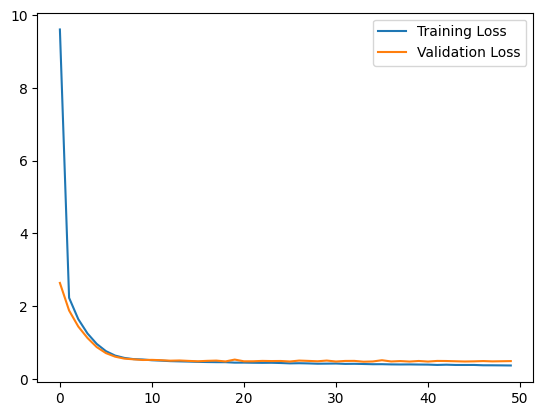

In [32]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense



# Load the wine_quality dataset
X_train, y_train, X_test, y_test = load_wine_quality()

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Keras model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))

# Plot the training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:

# ===== =====> Replace this line by your code. <===== ===== #


## &#x2766;

You may use the following code to do prediction using the trained model.

In [ ]:
N = 10
y_pred = model.predict(X_test[:N], verbose=0)
print("Actual:   ", *[f"{x:4.1f}" for x in y_test[:N]])
print("Predicted:", *[f"{x:4.1f}" for x in y_pred.ravel()])

Actual:     5.0  8.0  5.0  7.0  5.0  6.0  5.0  7.0  5.0  6.0
Predicted:  6.3  6.7  5.0  6.1  5.6  6.3  4.7  6.2  5.4  5.8


# Extras

## More experiments

### E1a (Experimenting with the RMSProp optimizer)

Modify the baseline model to use the RMSProp optimizer instead of the SGD optimizer. Specifically, copy the two code cells Baseline#1 and Baseline#2 below, and then change `"sgd"` to `"rmsprop"` in the `compile()` method call. Remember to execute the two cells in order.

State the validation loss in the final training epoch, and compare this loss to that of the baseline model. Comment on the curve of validation loss.

### E1b (Experimenting with a customized Adam optimizer)

Modify the baseline model to use a customized Adam optimizer instead of the SGD optimizer. Specifically, copy the two code cells Baseline#1 and Baseline#2 below, and then:

- create an Adam optimizer with a learning rate 0.1, and
- use that Adam optimizer in the `compile()` method call.

The modified code is shown below:

```python
adam_opt = keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss="mean_squared_error", optimizer=adam_opt)
```

Remember to execute the two cells in order.

State the validation loss in the final training epoch, and compare this loss to that of the baseline model. Comment on the curve of validation loss.

### E1c (Experimenting with no feature normalization)

In the program of the baseline model, the input features are normalized. Modify the program so that the features are not normalized. Specifically, copy the two code cells Baseline#1 and Baseline#2 below, and then remove or comment out the line that calls the `normalize_features()` function. Remember to execute the two cells in order.

State the validation loss in the final training epoch, and compare this loss to that of the baseline model. Comment on the curve of validation curve.

## Solutions to extra exercises

### E1a

In [ ]:
# Solution
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing

keras.utils.set_random_seed(42)
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

X_train, X_test = normalize_features(X_train, X_test)

model = keras.Sequential([
    layers.Dense(16, activation="sigmoid"),  # hidden layer
    layers.Dense(16, activation="sigmoid"),  # hidden layer
    layers.Dense(1, activation="linear")     # output layer
])

model.compile(loss="mean_squared_error", optimizer="rmsprop")
history = model.fit(X_train, y_train, epochs=20, verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/20


13/13 - 1s - loss: 604.3279 - val_loss: 626.2670 - 536ms/epoch - 41ms/step


Epoch 2/20


13/13 - 0s - loss: 590.9560 - val_loss: 614.6189 - 36ms/epoch - 3ms/step


Epoch 3/20


13/13 - 0s - loss: 580.1366 - val_loss: 604.0466 - 50ms/epoch - 4ms/step


Epoch 4/20


13/13 - 0s - loss: 570.0681 - val_loss: 593.7828 - 35ms/epoch - 3ms/step


Epoch 5/20


13/13 - 0s - loss: 560.2360 - val_loss: 583.8065 - 36ms/epoch - 3ms/step


Epoch 6/20


13/13 - 0s - loss: 550.7545 - val_loss: 574.2874 - 40ms/epoch - 3ms/step


Epoch 7/20


13/13 - 0s - loss: 541.5759 - val_loss: 564.8520 - 53ms/epoch - 4ms/step


Epoch 8/20


13/13 - 0s - loss: 532.6097 - val_loss: 555.8133 - 37ms/epoch - 3ms/step


Epoch 9/20


13/13 - 0s - loss: 524.0041 - val_loss: 546.9825 - 43ms/epoch - 3ms/step


Epoch 10/20


13/13 - 0s - loss: 515.5989 - val_loss: 538.4266 - 36ms/epoch - 3ms/step


Epoch 11/20


13/13 - 0s - loss: 507.4731 - val_loss: 530.1338 - 34ms/epoch - 3ms/step


Epoch 12/20


13/13 - 0s - loss: 499.5539 - val_loss: 522.0371 - 34ms/epoch - 3ms/step


Epoch 13/20


13/13 - 0s - loss: 491.8380 - val_loss: 514.1873 - 34ms/epoch - 3ms/step


Epoch 14/20


13/13 - 0s - loss: 484.3666 - val_loss: 506.4867 - 33ms/epoch - 3ms/step


Epoch 15/20


13/13 - 0s - loss: 477.0393 - val_loss: 499.0490 - 46ms/epoch - 4ms/step


Epoch 16/20


13/13 - 0s - loss: 469.9220 - val_loss: 491.7231 - 36ms/epoch - 3ms/step


Epoch 17/20


13/13 - 0s - loss: 462.9092 - val_loss: 484.5001 - 36ms/epoch - 3ms/step


Epoch 18/20


13/13 - 0s - loss: 455.9702 - val_loss: 477.3787 - 40ms/epoch - 3ms/step


Epoch 19/20


13/13 - 0s - loss: 449.1231 - val_loss: 470.3033 - 37ms/epoch - 3ms/step


Epoch 20/20


13/13 - 0s - loss: 442.3577 - val_loss: 463.3370 - 40ms/epoch - 3ms/step


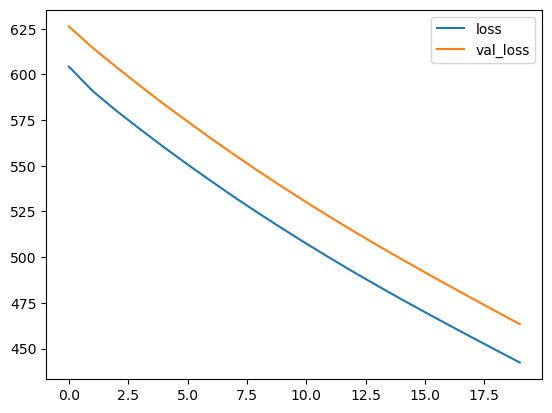

In [ ]:
# Solution
plot_history(history)

The final validation loss is about 463.3, which is much higher than 23.5 of the baseline model. In these 20 epochs of training, RMSProp performs very poorly compared to SGD.

The curve of validation loss is very similar to the case of Adam. The losses are high but decreasing, indicating some slow learning.

### E1b

In [ ]:
# Solution
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing

keras.utils.set_random_seed(42)
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

X_train, X_test = normalize_features(X_train, X_test)

model = keras.Sequential([
    layers.Dense(16, activation="sigmoid"),  # hidden layer
    layers.Dense(16, activation="sigmoid"),  # hidden layer
    layers.Dense(1, activation="linear")     # output layer
])

adam_opt = keras.optimizers.Adam(learning_rate=0.1)
model.compile(loss="mean_squared_error", optimizer=adam_opt)
history = model.fit(X_train, y_train, epochs=20, verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/20


13/13 - 1s - loss: 364.1589 - val_loss: 170.1368 - 661ms/epoch - 51ms/step


Epoch 2/20


13/13 - 0s - loss: 102.1096 - val_loss: 84.3792 - 37ms/epoch - 3ms/step


Epoch 3/20


13/13 - 0s - loss: 88.0365 - val_loss: 74.7306 - 49ms/epoch - 4ms/step


Epoch 4/20


13/13 - 0s - loss: 69.4207 - val_loss: 56.8997 - 54ms/epoch - 4ms/step


Epoch 5/20


13/13 - 0s - loss: 55.0495 - val_loss: 49.4195 - 53ms/epoch - 4ms/step


Epoch 6/20


13/13 - 0s - loss: 49.4576 - val_loss: 46.5848 - 39ms/epoch - 3ms/step


Epoch 7/20


13/13 - 0s - loss: 46.3657 - val_loss: 43.9035 - 57ms/epoch - 4ms/step


Epoch 8/20


13/13 - 0s - loss: 41.3472 - val_loss: 37.7666 - 55ms/epoch - 4ms/step


Epoch 9/20


13/13 - 0s - loss: 34.9085 - val_loss: 32.6184 - 35ms/epoch - 3ms/step


Epoch 10/20


13/13 - 0s - loss: 28.3579 - val_loss: 27.7496 - 41ms/epoch - 3ms/step


Epoch 11/20


13/13 - 0s - loss: 23.9250 - val_loss: 28.6373 - 42ms/epoch - 3ms/step


Epoch 12/20


13/13 - 0s - loss: 19.0695 - val_loss: 25.0564 - 44ms/epoch - 3ms/step


Epoch 13/20


13/13 - 0s - loss: 17.5773 - val_loss: 25.2012 - 38ms/epoch - 3ms/step


Epoch 14/20


13/13 - 0s - loss: 14.8235 - val_loss: 24.9300 - 37ms/epoch - 3ms/step


Epoch 15/20


13/13 - 0s - loss: 13.9820 - val_loss: 21.3071 - 53ms/epoch - 4ms/step


Epoch 16/20


13/13 - 0s - loss: 12.8920 - val_loss: 22.7849 - 42ms/epoch - 3ms/step


Epoch 17/20


13/13 - 0s - loss: 10.6229 - val_loss: 21.7228 - 34ms/epoch - 3ms/step


Epoch 18/20


13/13 - 0s - loss: 9.0938 - val_loss: 22.8994 - 34ms/epoch - 3ms/step


Epoch 19/20


13/13 - 0s - loss: 8.2806 - val_loss: 21.0151 - 35ms/epoch - 3ms/step


Epoch 20/20


13/13 - 0s - loss: 7.8274 - val_loss: 20.4864 - 38ms/epoch - 3ms/step


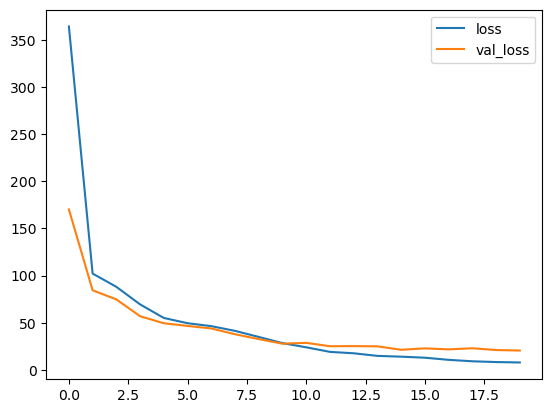

In [ ]:
# Solution
plot_history(history)

The final validation loss is about 20.5, which is lower than 23.5 of the baseline model. Adam with a suitable learning rate works better than SGD for the task.

The curve of validation loss is similar to that of the baseline model.

### E1c

In [ ]:
# Solution
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import boston_housing

keras.utils.set_random_seed(42)
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# X_train, X_test = normalize_features(X_train, X_test)

model = keras.Sequential([
    layers.Dense(16, activation="sigmoid"),  # hidden layer
    layers.Dense(16, activation="sigmoid"),  # hidden layer
    layers.Dense(1, activation="linear")     # output layer
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, verbose=2,
          validation_data=(X_test, y_test))

Epoch 1/20


13/13 - 0s - loss: 240.2469 - val_loss: 85.9967 - 459ms/epoch - 35ms/step


Epoch 2/20


13/13 - 0s - loss: 85.2058 - val_loss: 82.5394 - 38ms/epoch - 3ms/step


Epoch 3/20


13/13 - 0s - loss: 85.6491 - val_loss: 85.0071 - 36ms/epoch - 3ms/step


Epoch 4/20


13/13 - 0s - loss: 85.2843 - val_loss: 83.3259 - 38ms/epoch - 3ms/step


Epoch 5/20


13/13 - 0s - loss: 84.8662 - val_loss: 82.9886 - 34ms/epoch - 3ms/step


Epoch 6/20


13/13 - 0s - loss: 84.8703 - val_loss: 84.5817 - 45ms/epoch - 3ms/step


Epoch 7/20


13/13 - 0s - loss: 84.5735 - val_loss: 82.7463 - 37ms/epoch - 3ms/step


Epoch 8/20


13/13 - 0s - loss: 84.6622 - val_loss: 84.3439 - 44ms/epoch - 3ms/step


Epoch 9/20


13/13 - 0s - loss: 83.5510 - val_loss: 83.0340 - 34ms/epoch - 3ms/step


Epoch 10/20


13/13 - 0s - loss: 84.2110 - val_loss: 82.4072 - 37ms/epoch - 3ms/step


Epoch 11/20


13/13 - 0s - loss: 83.1975 - val_loss: 82.3572 - 35ms/epoch - 3ms/step


Epoch 12/20


13/13 - 0s - loss: 82.6747 - val_loss: 81.8453 - 37ms/epoch - 3ms/step


Epoch 13/20


13/13 - 0s - loss: 82.9706 - val_loss: 82.8356 - 35ms/epoch - 3ms/step


Epoch 14/20


13/13 - 0s - loss: 81.9235 - val_loss: 81.0714 - 34ms/epoch - 3ms/step


Epoch 15/20


13/13 - 0s - loss: 81.7237 - val_loss: 81.3210 - 35ms/epoch - 3ms/step


Epoch 16/20


13/13 - 0s - loss: 81.2037 - val_loss: 80.5685 - 33ms/epoch - 3ms/step


Epoch 17/20


13/13 - 0s - loss: 81.0723 - val_loss: 80.4520 - 36ms/epoch - 3ms/step


Epoch 18/20


13/13 - 0s - loss: 80.8289 - val_loss: 80.5522 - 44ms/epoch - 3ms/step


Epoch 19/20


13/13 - 0s - loss: 80.1603 - val_loss: 80.5112 - 36ms/epoch - 3ms/step


Epoch 20/20


13/13 - 0s - loss: 79.8056 - val_loss: 80.2545 - 36ms/epoch - 3ms/step


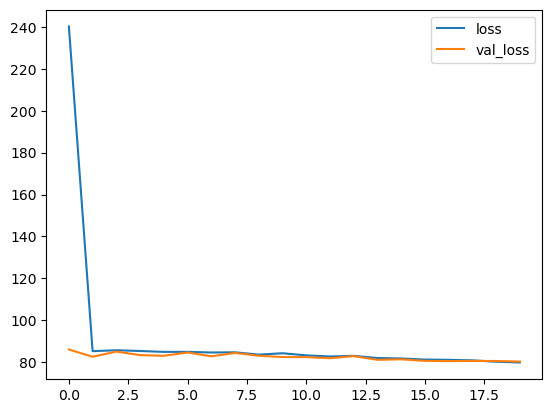

In [ ]:
# Solution
plot_history(history)

The final validation loss is about 80.3, which is much higher than 23.5 of the baseline model. Without feature normalization, the model cannot trained or the training is extremely slow.

The curve of validation loss is mainly horizontal, indicating not much learning is achieved.

## &#x2766;